In [1]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

https://en.wikipedia.org/wiki/Gibbs_phenomenon

In [2]:
np.random.seed(123456789)

In [3]:
rate = 441000
dt = 5
N = dt*rate

In [4]:
t = np.linspace(0, dt, N)

In [5]:
n = 0.01*np.random.randn(N)

In [6]:
n

array([ 0.02212902,  0.02128398,  0.01841711, ..., -0.00932492,
        0.00579105,  0.00344803])

nn = 20
ns = np.array([np.roll(n, i) for i in range(nn)])
nc = np.sum(ns, axis=0)/nn
nc

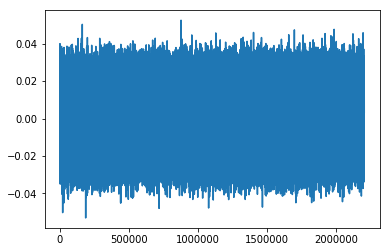

In [7]:
plt.plot(n)

In [8]:
x = (3+0.1*t)*np.sin(2*np.pi*(440+5*t)*t) \
- (2+0.5*t)*np.sin(2*np.pi*(852-2*t)*t) \
- (1+0.5*t)*np.sin(2*np.pi*(5000-20*t)*t) 

In [9]:
x = x/x.max()

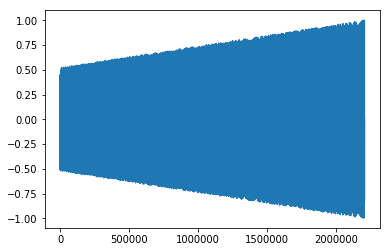

In [10]:
plt.plot(x)

In [11]:
#plt.acorr(x[:2**24], maxlags=360)

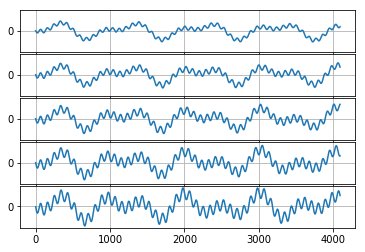

In [12]:
fig, axe = plt.subplots(5, 1, sharey=True, gridspec_kw={'hspace': 0.05})
for i in range(5):
    axe[i].plot(x[i*rate:i*rate+2**12], linewidth=1.5)
    axe[i].set_yticks([0])
    #axe[i].set_xticklabels([])
    #axe[i].set_yticklabels([])
    axe[i].grid()

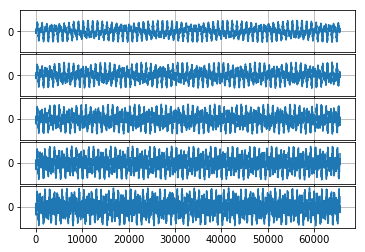

In [13]:
fig, axe = plt.subplots(5, 1, sharey=True, gridspec_kw={'hspace': 0.05})
for i in range(5):
    axe[i].plot(x[i*rate:i*rate+2**16], linewidth=1.5)
    axe[i].grid()
axe[0].set_yticks([0])
#axe[i].set_xlim([0, 2**16])

In [14]:
# Compute PSD:
f, P = signal.periodogram(x, rate) # Frequency range and PSD
#f = np.linspace(0, f[-1], P.shape[0]) # Frequency vector: f[-1] = rate/2

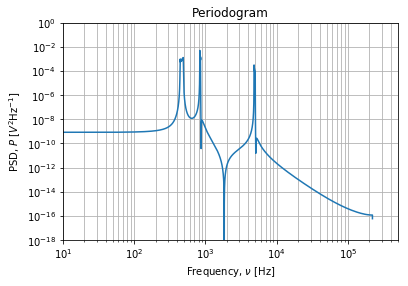

In [15]:
# Display PSD:
fig, axe = plt.subplots()
axe.loglog(f, P)#, linewidth=1.2)
axe.set_xlim([1e1,5e5])
axe.set_ylim([1e-18, 1e0])
axe.set_xlabel(r'Frequency, $\nu$ $[\mathrm{Hz}]$')
axe.set_ylabel(r'PSD, $P$ $[V^2\mathrm{Hz}^{-1}]$')
axe.set_title('Periodogram')
axe.grid(which='both')

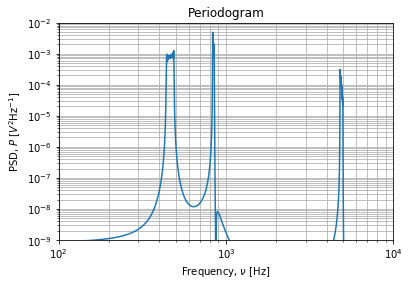

In [16]:
# Display PSD:
fig, axe = plt.subplots()
axe.loglog(f, P)#, linewidth=1.2)
axe.set_xlim([1e2, 1e4])
axe.set_ylim([1e-9, 1e-2])
axe.set_xlabel(r'Frequency, $\nu$ $[\mathrm{Hz}]$')
axe.set_ylabel(r'PSD, $P$ $[V^2\mathrm{Hz}^{-1}]$')
axe.set_title('Periodogram')
axe.grid(which='both')

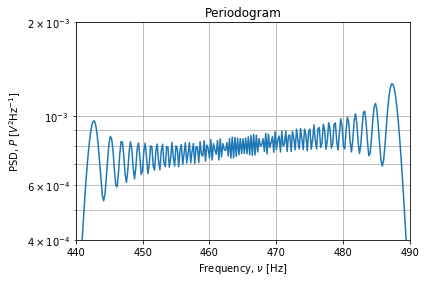

In [17]:
# Display PSD:
fig, axe = plt.subplots()
axe.semilogy(f, P)#, linewidth=1.2)
axe.set_xlim([4.4e2, 4.9e2])
axe.set_ylim([4e-4, 2e-3])
axe.set_xticks(np.arange(440, 491, 10))
axe.set_xlabel(r'Frequency, $\nu$ $[\mathrm{Hz}]$')
axe.set_ylabel(r'PSD, $P$ $[V^2\mathrm{Hz}^{-1}]$')
axe.set_title('Periodogram')
axe.grid(which='both')

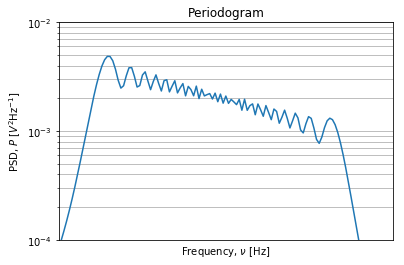

In [18]:
# Display PSD:
fig, axe = plt.subplots()
axe.loglog(f, P)#, linewidth=1.2)
axe.set_xlim([830, 855])
axe.set_ylim([1e-4, 1e-2])
axe.set_xlabel(r'Frequency, $\nu$ $[\mathrm{Hz}]$')
axe.set_ylabel(r'PSD, $P$ $[V^2\mathrm{Hz}^{-1}]$')
axe.set_title('Periodogram')
axe.grid(which='both')

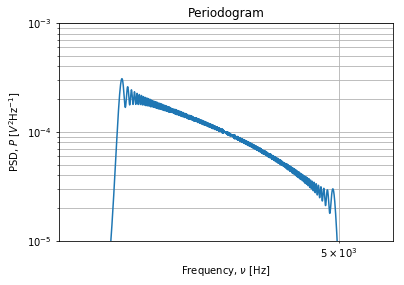

In [19]:
# Display PSD:
fig, axe = plt.subplots()
axe.loglog(f, P)#, linewidth=1.2)
axe.set_xlim([4750, 5050])
axe.set_ylim([1e-5, 1e-3])
axe.set_xlabel(r'Frequency, $\nu$ $[\mathrm{Hz}]$')
axe.set_ylabel(r'PSD, $P$ $[V^2\mathrm{Hz}^{-1}]$')
axe.set_title('Periodogram')
axe.grid(which='both')

[ 437.39318848  854.59899902 4999.74060059]
[ 450.85144043  847.86987305 4959.36584473]
[ 457.58056641  841.14074707 4918.99108887]
[ 471.03881836  841.14074707 4878.61633301]
[ 477.76794434  834.41162109 4838.24157715]


Text(0.5, 0, 'Frequency, $\\nu$ $[\\mathrm{Hz}]$')

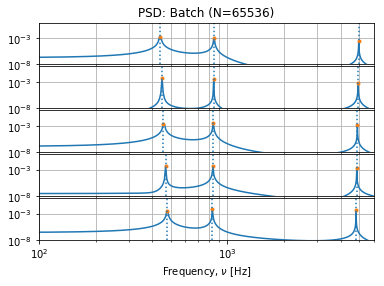

In [20]:
W = 2**16
fig, axe = plt.subplots(5, 1, sharey=True, sharex=True, gridspec_kw={'hspace': 0.05})
for i in range(5):
    fx, Px = signal.periodogram(x[i*rate:i*rate+W], rate)
    pidx = signal.find_peaks(Px, height=1e-4, distance=5)[0]
    print(fx[pidx])
    axe[i].loglog(fx, Px)
    axe[i].plot(fx[pidx], Px[pidx], '.')
    for k in pidx:
        axe[i].axvline(fx[k], linestyle=':')
    axe[i].grid(which="both")
axe[0].set_xlim([1e2, 6e3])
axe[0].set_ylim([1e-8, 1])
axe[0].set_title("PSD: Batch (N=%d)" % W)
axe[i].set_xlabel(r'Frequency, $\nu$ $[\mathrm{Hz}]$')
#axe.set_ylabel(r'PSD, $P$ $[V^2\mathrm{Hz}^{-1}]$')

In [21]:
2**16/rate

0.1486077097505669

In [22]:
P

array([4.67444203e-35, 8.18729116e-10, 8.18729722e-10, ...,
       1.16010330e-16, 1.16010342e-16, 5.80051608e-17])